In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym_members_exercise_tracking_synthetic_data.csv


# **Step:1 Load Data set**

In [2]:
df=pd.read_csv("/kaggle/input/gym_members_exercise_tracking_synthetic_data.csv")
df.head(5) #Display Initial Rows

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


# **Step 2: Inspect the Data**

In [3]:
# Check the shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (1800, 15)


In [4]:
# Display column names
print("Columns:", df.columns)

Columns: Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [5]:
# Examine data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [6]:
# Summary of numeric columns
print(df.describe())

               Age  Weight (kg)   Height (m)      Avg_BPM  Resting_BPM  \
count  1790.000000  1778.000000  1774.000000  1770.000000  1781.000000   
mean     34.475419    67.606637     1.739233   146.259322    63.951151   
std      12.315728    19.861408     0.123892    15.219516     7.936502   
min      18.000000    40.000000     1.500000   120.000000    50.000000   
25%      23.000000    52.300000     1.650000   133.250000    57.000000   
50%      33.000000    65.300000     1.730000   146.000000    65.000000   
75%      45.000000    80.100000     1.820000   160.000000    72.000000   
max      59.000000   129.900000     2.000000   169.000000    74.000000   

       Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count               1777.000000      1777.000000     1784.000000   
mean                   1.391598      1033.698931       23.509361   
std                    0.372342       328.049662        5.865557   
min                    0.500000       303.000000       10.000

# **Step 3: Identify and Handle Missing Values**

In [7]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64


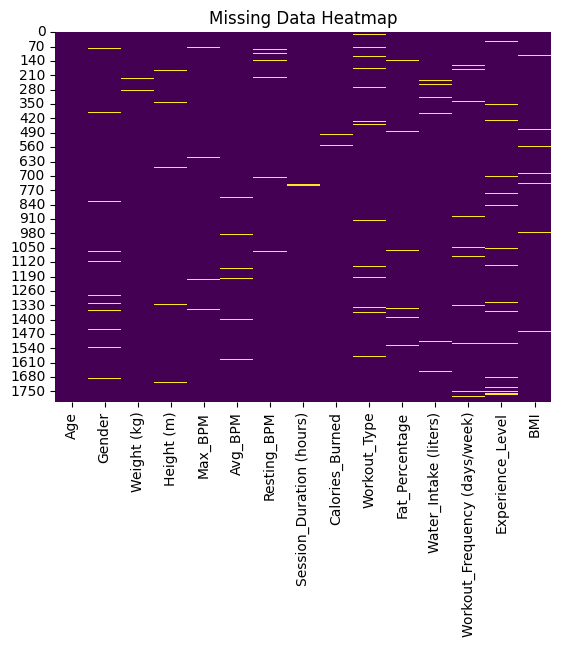

In [8]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
# Step 3: Handle Missing Values

# For numeric columns, replace missing values with the column mean/median
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                   'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 
                   'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

for col in numeric_columns:
    if col in df.columns:
        # Convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Replace missing values with mean or median
        if col in ['Age', 'Max_BPM', 'Avg_BPM', 'Calories_Burned']:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].median())

# For categorical columns, replace missing values with the column mode
categorical_columns = ['Gender', 'Workout_Type', 'Experience_Level']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


# **Step 4: Check for Duplicates**

In [10]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


# **Step 5: Validate Data**

### 1 Numeric Columns:

In [11]:
# Convert 'Max_BPM' to numeric, coercing errors to NaN (invalid entries like '?' will be replaced with NaN)
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')

# Print the count of NaN values before imputation
print("NaN values in 'Max_BPM' before imputation:", df['Max_BPM'].isna().sum())

# Fill NaN values in 'Max_BPM' with the median of the column (imputation)
df['Max_BPM'] = df['Max_BPM'].fillna(df['Max_BPM'].median())

# Print the count of NaN values after imputation to confirm the fill
print("NaN values in 'Max_BPM' after imputation:", df['Max_BPM'].isna().sum())

# Optionally, check for other numeric columns (e.g., Avg_BPM, Resting_BPM)
df['Avg_BPM'] = pd.to_numeric(df['Avg_BPM'], errors='coerce').fillna(df['Avg_BPM'].median())
df['Resting_BPM'] = pd.to_numeric(df['Resting_BPM'], errors='coerce').fillna(df['Resting_BPM'].median())

# Print the first few rows to verify the changes in numeric columns
print("First few rows after cleaning numeric columns:")
print(df[['Max_BPM', 'Avg_BPM', 'Resting_BPM']].head())


NaN values in 'Max_BPM' before imputation: 0
NaN values in 'Max_BPM' after imputation: 0
First few rows after cleaning numeric columns:
   Max_BPM  Avg_BPM  Resting_BPM
0    174.0    152.0         74.0
1    166.0    156.0         73.0
2    187.0    166.0         64.0
3    187.0    169.0         58.0
4    177.0    169.0         66.0


### 2. Categorical Columns:

In [12]:


# Check unique values for categorical columns before cleaning
categorical_columns = ['Gender', 'Workout_Type', 'Experience_Level']
for col in categorical_columns:
    print(f"Unique values in '{col}' before cleaning: {df[col].unique()}")

# Standardize 'Gender' column (e.g., Male, M → Male; Female, F → Female)
df['Gender'] = df['Gender'].replace({
    'M': 'Male', 'Male ': 'Male', 'male': 'Male', '\\tmale': 'Male', 'F': 'Female', 
    'Female ': 'Female', 'female': 'Female', '\\tfemale': 'Female'
})

# Standardize 'Workout_Type' column (e.g., strip unwanted characters, ensure consistency)
df['Workout_Type'] = df['Workout_Type'].replace({
    '\\nStrength': 'Strength', '\\tCardio': 'Cardio', '\\tYoga': 'Yoga', '\\nCardio': 'Cardio', 
    'Cardio ': 'Cardio', 'Strength ': 'Strength', 'Yoga ': 'Yoga'
})

# Convert 'Experience_Level' to string and strip any extra spaces
df['Experience_Level'] = df['Experience_Level'].astype(str).str.strip()

# Check unique values for categorical columns after cleaning
for col in categorical_columns:
    print(f"Unique values in '{col}' after cleaning: {df[col].unique()}")

# Check for any NaN values remaining in categorical columns after cleaning
print("NaN values in categorical columns after cleaning:")
print(df[categorical_columns].isna().sum())  # This line was missing the closing quotation mark


Unique values in 'Gender' before cleaning: ['Female' 'Male']
Unique values in 'Workout_Type' before cleaning: ['Strength' 'Cardio' 'HIIT' 'Yoga' '\\nStrength' '\\tCardio' '\\tYoga']
Unique values in 'Experience_Level' before cleaning: [2. 1. 3.]
Unique values in 'Gender' after cleaning: ['Female' 'Male']
Unique values in 'Workout_Type' after cleaning: ['Strength' 'Cardio' 'HIIT' 'Yoga']
Unique values in 'Experience_Level' after cleaning: ['2.0' '1.0' '3.0']
NaN values in categorical columns after cleaning:
Gender              0
Workout_Type        0
Experience_Level    0
dtype: int64


# **Step 6: Create New Features**

## 1. BMI Validation

In [13]:



# Check if BMI is consistent with the formula BMI = Weight (kg) / (Height (m))^2

# Recalculate BMI where inconsistencies are found
# First, check for rows where BMI needs to be recalculated
df['Recalculated_BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)

# Check for BMI column inconsistencies
# For example, let's assume BMI should be within a reasonable range (10 to 100)
df['BMI_Needs_Recalculation'] = (df['BMI'] < 10) | (df['BMI'] > 100)  # These are just sample conditions, adjust as needed

# Recalculate BMI for rows where the current BMI is inconsistent
df.loc[df['BMI_Needs_Recalculation'], 'BMI'] = df.loc[df['BMI_Needs_Recalculation'], 'Recalculated_BMI']

# Check the result
print("BMI columns after recalculation:")
print(df[['BMI', 'Recalculated_BMI', 'BMI_Needs_Recalculation']].head())



BMI columns after recalculation:
     BMI  Recalculated_BMI  BMI_Needs_Recalculation
0  14.31         25.060701                    False
1  33.49         25.291887                    False
2  12.73         18.933528                    False
3  20.37         22.732762                    False
4  20.83         17.439556                    False


## 2. Workout Intensity

In [14]:
# Create a new column 'Workout_Intensity' = Avg_BPM / Max_BPM
df['Workout_Intensity'] = df['Avg_BPM'] / df['Max_BPM']

# Display the updated DataFrame to check the new column
print("DataFrame with Workout Intensity:")
print(df[['Workout_Intensity']].head())

DataFrame with Workout Intensity:
   Workout_Intensity
0           0.873563
1           0.939759
2           0.887701
3           0.903743
4           0.954802


# **Step 7: Explore Data Distributions**

## 1. Histograms for Numeric Columns:

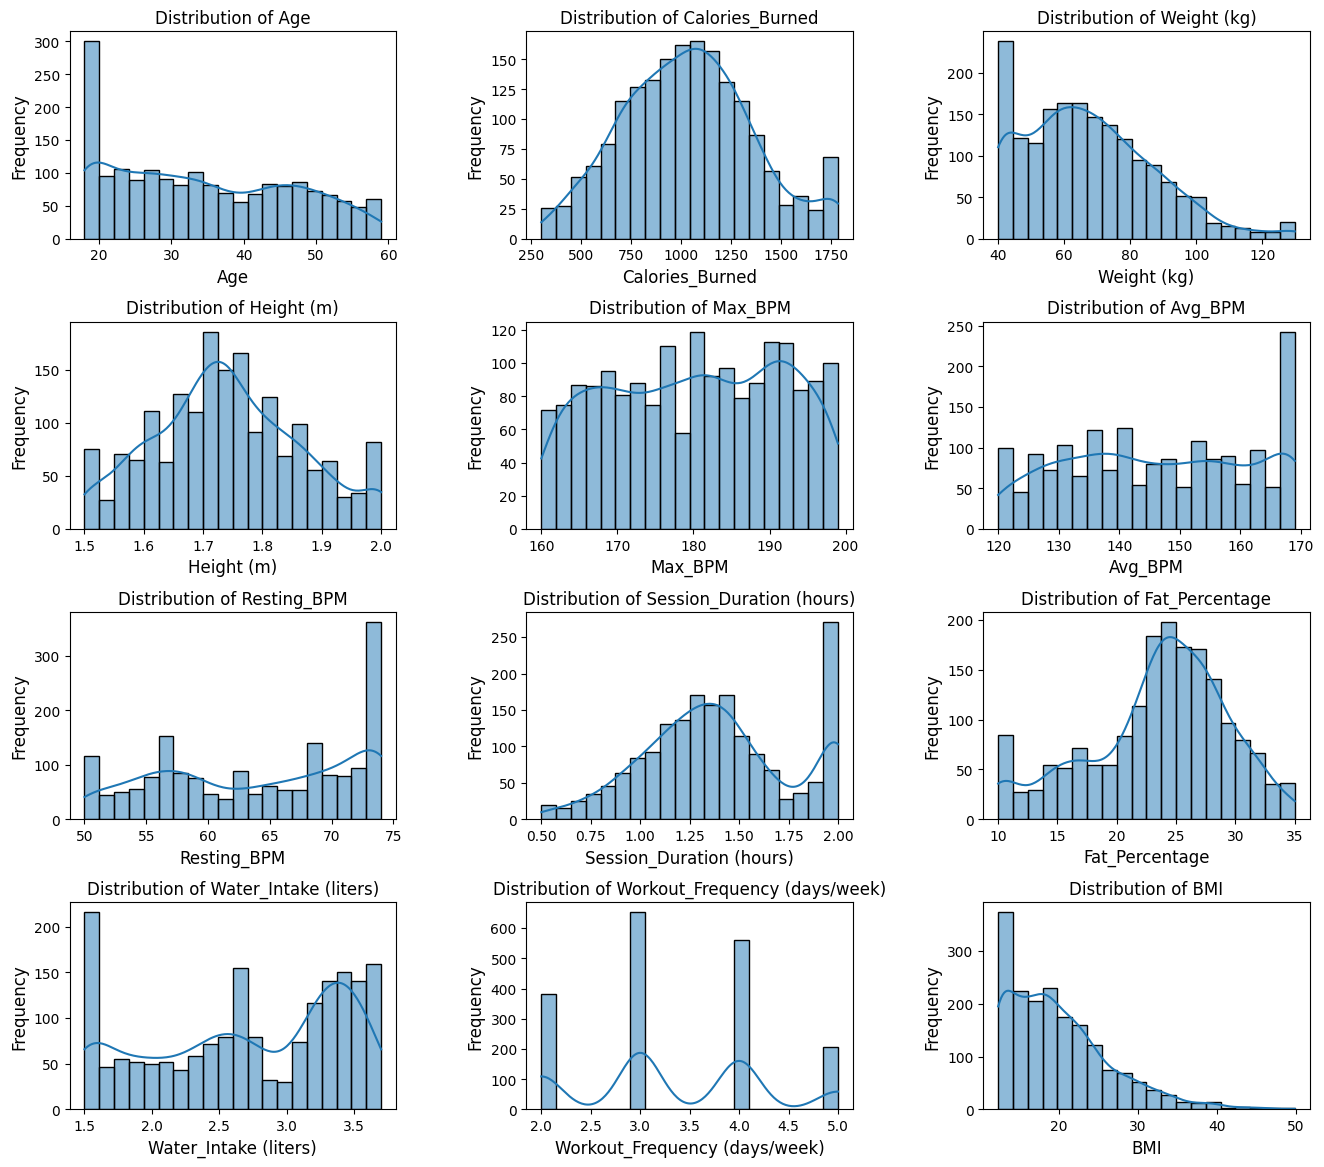

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Suppress FutureWarning about 'use_inf_as_na' option
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace inf and -inf values with NaN in the numeric columns to avoid warnings during plotting
numeric_columns = ['Age', 'Calories_Burned', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                   'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

# Assuming df is already loaded
df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Create histograms for all numeric columns with a larger figure size and adjusted layout
plt.figure(figsize=(16, 14))  # Increase the figure size further
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns, adjusted to 4 rows to spread out the plots
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}', fontsize=12)  # Increase title font size
    plt.xlabel(column, fontsize=12)  # Increase x-axis label font size
    plt.ylabel('Frequency', fontsize=12)  # Increase y-axis label font size

# Adjust the space between plots to prevent overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()


## 2. Box Plots for Outliers:

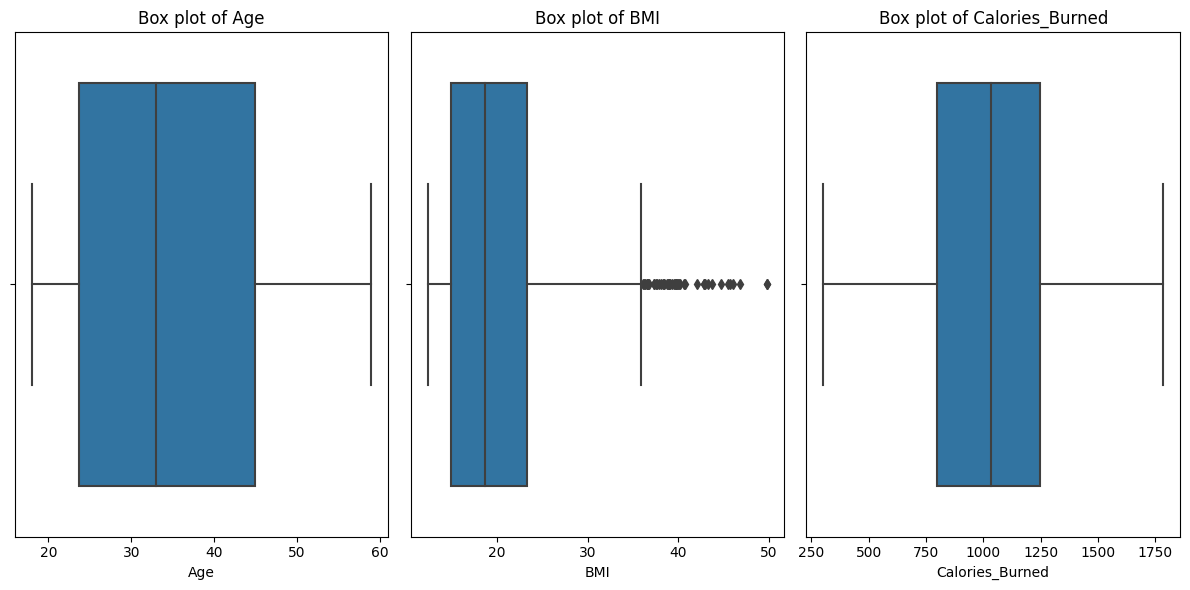

In [16]:
# Step 7.2: Use box plots to check for outliers in columns like Age, BMI, and Calories_Burned
plt.figure(figsize=(12, 6))

# Box plot for Age
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'])
plt.title('Box plot of Age')

# Box plot for BMI
plt.subplot(1, 3, 2)
sns.boxplot(x=df['BMI'])
plt.title('Box plot of BMI')

# Box plot for Calories_Burned
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Calories_Burned'])
plt.title('Box plot of Calories_Burned')

plt.tight_layout()
plt.show()


## 3. Bar Plots for Categorical Columns:

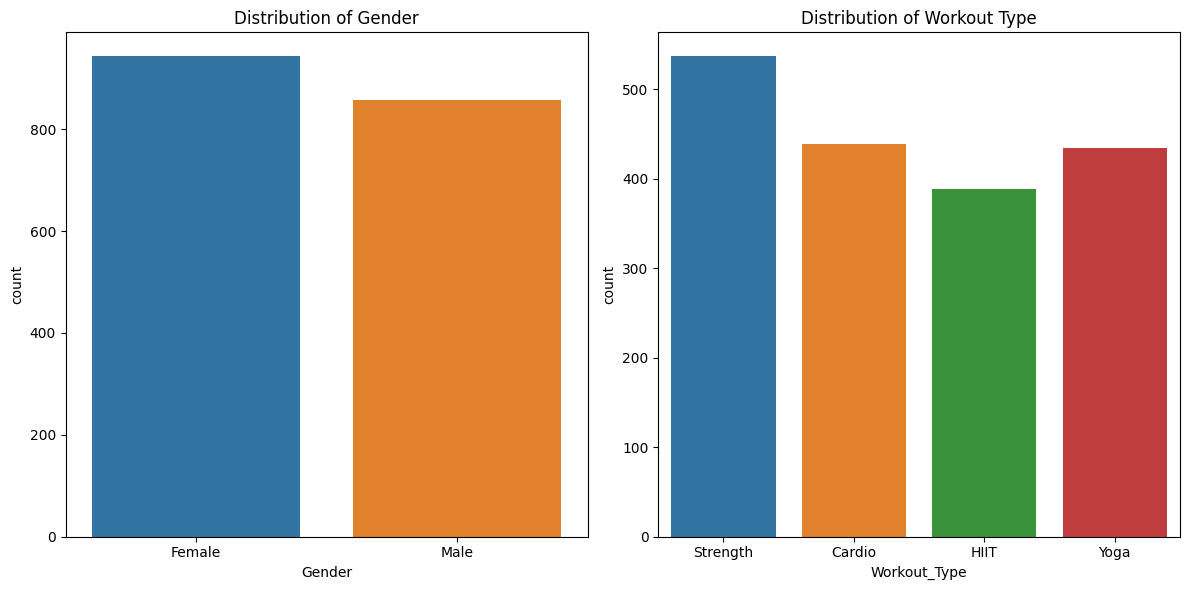

In [17]:
# Step 7.3: Examine the distribution of categorical columns (Gender, Workout_Type) using bar plots
plt.figure(figsize=(12, 6))

# Bar plot for Gender
plt.subplot(1, 2, 1)
sns.countplot(x=df['Gender'])
plt.title('Distribution of Gender')

# Bar plot for Workout_Type
plt.subplot(1, 2, 2)
sns.countplot(x=df['Workout_Type'])
plt.title('Distribution of Workout Type')

plt.tight_layout()
plt.show()


# **Step 8: Handle Outliers**

In [18]:
# Ensure that you are working with numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the calculated values
print("25th Percentile (Q1):")
print(Q1)
print("\n75th Percentile (Q3):")
print(Q3)
print("\nInterquartile Range (IQR):")
print(IQR)
print("\nLower Bound for Outliers:")
print(lower_bound)
print("\nUpper Bound for Outliers:")
print(upper_bound)

# Detect outliers
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# Print outliers (True indicates an outlier)
print("\nOutliers Detected (True indicates outlier):")
print(outliers)

# Optional: Remove outliers (this will drop rows containing outliers in any numeric column)
df_no_outliers = df[~outliers.any(axis=1)]

# Optionally, print the DataFrame without outliers
print("\nDataFrame after Removing Outliers:")
print(df_no_outliers)


25th Percentile (Q1):
Age                               23.750000
Weight (kg)                       52.575000
Height (m)                         1.660000
Max_BPM                          170.000000
Avg_BPM                          134.000000
Resting_BPM                       57.000000
Session_Duration (hours)           1.140000
Calories_Burned                  800.000000
Fat_Percentage                    20.500000
Water_Intake (liters)              2.100000
Workout_Frequency (days/week)      3.000000
BMI                               14.860000
Recalculated_BMI                  16.952861
Workout_Intensity                  0.733605
Name: 0.25, dtype: float64

75th Percentile (Q3):
Age                                45.000000
Weight (kg)                        80.000000
Height (m)                          1.820000
Max_BPM                           190.000000
Avg_BPM                           159.000000
Resting_BPM                        72.000000
Session_Duration (hours)            1.6300

In [19]:
# Remove rows with any outlier values in any numeric column
df_no_outliers = df[~outliers.any(axis=1)]

# Print the DataFrame after removing outliers
print("\nDataFrame after Removing Outliers:")
print(df_no_outliers)



DataFrame after Removing Outliers:
       Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     34.0  Female         86.7        1.86    174.0    152.0         74.0   
1     26.0  Female         84.7        1.83    166.0    156.0         73.0   
2     22.0    Male         64.8        1.85    187.0    166.0         64.0   
3     54.0  Female         75.3        1.82    187.0    169.0         58.0   
4     34.0  Female         52.8        1.74    177.0    169.0         66.0   
...    ...     ...          ...         ...      ...      ...          ...   
1794  36.0  Female         80.8        1.71    162.0    163.0         74.0   
1796  52.0    Male         84.3        1.69    164.0    169.0         54.0   
1797  47.0    Male         70.1        1.84    188.0    129.0         67.0   
1798  35.0    Male         49.3        1.71    180.0    152.0         73.0   
1799  40.0    Male         79.5        1.92    184.0    156.0         52.0   

      Session_Duration (hou

In [20]:
# Apply log transformation to numeric columns
# Ensure all values are positive before applying log
numeric_df_transformed = numeric_df.apply(lambda x: np.log(x + 1) if (x > 0).all() else x)

# Print the transformed DataFrame
print("\nDataFrame after Log Transformation:")
print(numeric_df_transformed)



DataFrame after Log Transformation:
           Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0     3.555348     4.473922    1.050822  5.164786  5.030438     4.317488   
1     3.295837     4.450853    1.040277  5.117994  5.056246     4.304065   
2     3.135494     4.186620    1.047319  5.236442  5.117994     4.174387   
3     4.007333     4.334673    1.036737  5.236442  5.135798     4.077537   
4     3.555348     3.985273    1.007958  5.181784  5.135798     4.204693   
...        ...          ...         ...       ...       ...          ...   
1795  4.007333     4.494239    1.098612  5.159055  4.905275     4.077537   
1796  3.970292     4.446174    0.989541  5.105945  5.135798     4.007333   
1797  3.871201     4.264087    1.043804  5.241747  4.867534     4.219508   
1798  3.583519     3.918005    0.996949  5.198497  5.030438     4.304065   
1799  3.713572     4.388257    1.071584  5.220356  5.056246     3.970292   

      Session_Duration (hours)  Calories_Burned  F

In [21]:
# Cap outliers: set values above the upper bound to the upper bound, and below the lower bound to the lower bound
df_capped = df.copy()

# Cap the values
for column in numeric_df.columns:
    df_capped[column] = df[column].apply(lambda x: upper_bound[column] if x > upper_bound[column] else (lower_bound[column] if x < lower_bound[column] else x))

# Print the DataFrame after capping outliers
print("\nDataFrame after Capping Outliers:")
print(df_capped)



DataFrame after Capping Outliers:
       Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     34.0  Female         86.7        1.86    174.0    152.0         74.0   
1     26.0  Female         84.7        1.83    166.0    156.0         73.0   
2     22.0    Male         64.8        1.85    187.0    166.0         64.0   
3     54.0  Female         75.3        1.82    187.0    169.0         58.0   
4     34.0  Female         52.8        1.74    177.0    169.0         66.0   
...    ...     ...          ...         ...      ...      ...          ...   
1795  54.0    Male         88.5        2.00    173.0    134.0         58.0   
1796  52.0    Male         84.3        1.69    164.0    169.0         54.0   
1797  47.0    Male         70.1        1.84    188.0    129.0         67.0   
1798  35.0    Male         49.3        1.71    180.0    152.0         73.0   
1799  40.0    Male         79.5        1.92    184.0    156.0         52.0   

      Session_Duration (hour

# **Step 9: Analyze Relationships**

## 1. Correlation Analysis:

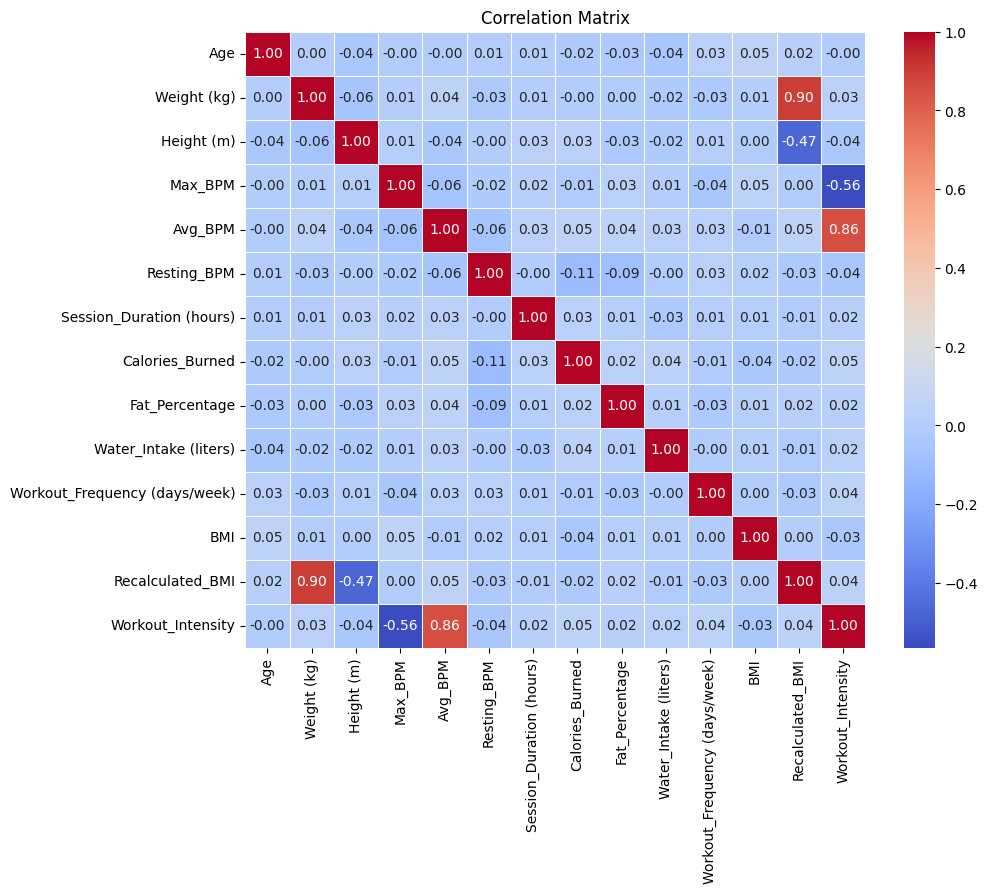

In [22]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## 2. Categorical vs. Numeric Analysis:

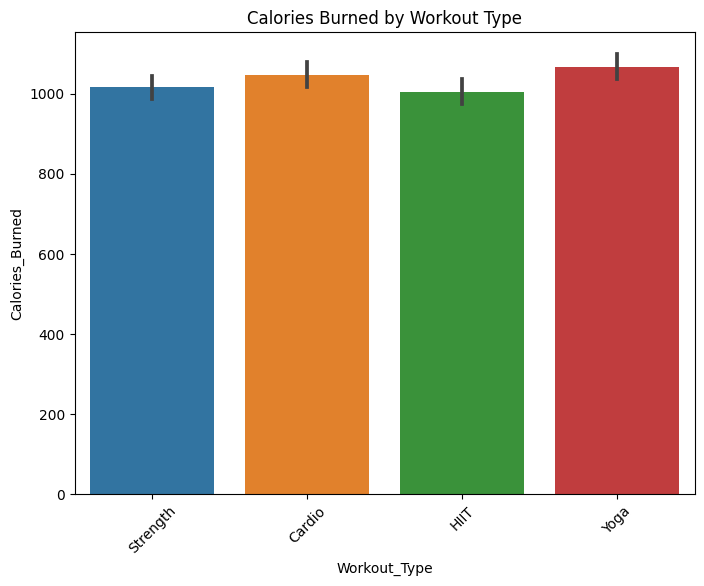

In [23]:
# Plot a bar plot for Calories_Burned vs Workout_Type
plt.figure(figsize=(8, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Calories Burned by Workout Type')
plt.xticks(rotation=45)
plt.show()


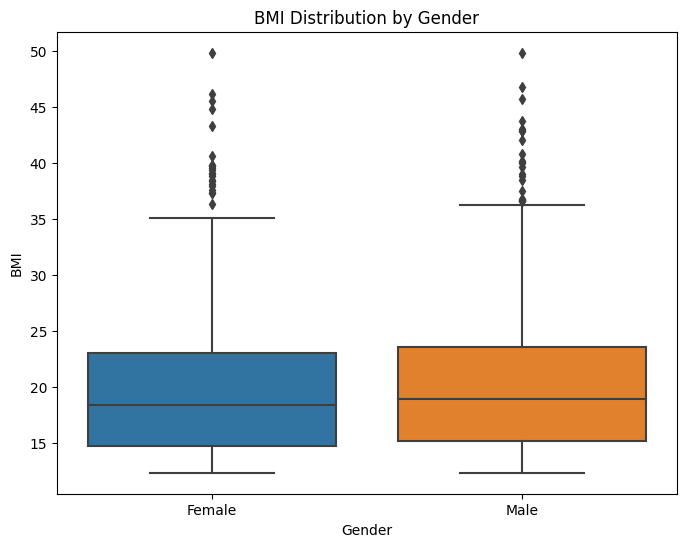

In [24]:
# Box plot for BMI across Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BMI', data=df)
plt.title('BMI Distribution by Gender')
plt.show()


## 3. Multi-Variable Analysis:

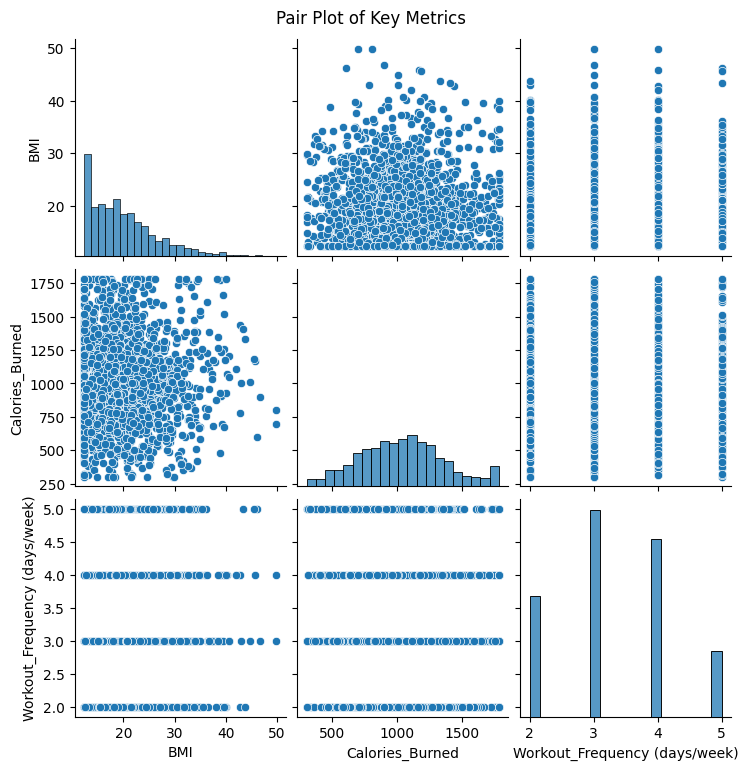

In [25]:
# Updated key metrics list with the correct column names
key_metrics = ['BMI', 'Calories_Burned', 'Workout_Frequency (days/week)']

# Generate the pair plot
sns.pairplot(df[key_metrics])
plt.suptitle('Pair Plot of Key Metrics', y=1.02)
plt.show()


# **Step 10: Encode Categorical Variables**

In [26]:
# One-Hot Encoding for 'Gender' and 'Workout_Type'
df_encoded = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)

# Print the first few rows to check the result
print(df_encoded.head())


    Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0         86.7        1.86    174.0    152.0         74.0   
1  26.0         84.7        1.83    166.0    156.0         73.0   
2  22.0         64.8        1.85    187.0    166.0         64.0   
3  54.0         75.3        1.82    187.0    169.0         58.0   
4  34.0         52.8        1.74    177.0    169.0         66.0   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.12            712.0            12.8   
1                      1.00            833.0            27.9   
2                      1.24           1678.0            28.7   
3                      1.45            628.0            31.8   
4                      1.60           1286.0            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week) Experience_Level  \
0                    2.4                            5.0              2.0   
1                    2.8                            5.0     

In [27]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Gender'
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Label Encoding for 'Workout_Type'
le_workout = LabelEncoder()
df['Workout_Type'] = le_workout.fit_transform(df['Workout_Type'])

# Print the first few rows to check the result
print(df.head())


    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0       0         86.7        1.86    174.0    152.0         74.0   
1  26.0       0         84.7        1.83    166.0    156.0         73.0   
2  22.0       1         64.8        1.85    187.0    166.0         64.0   
3  54.0       0         75.3        1.82    187.0    169.0         58.0   
4  34.0       0         52.8        1.74    177.0    169.0         66.0   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.12            712.0             2            12.8   
1                      1.00            833.0             2            27.9   
2                      1.24           1678.0             0            28.7   
3                      1.45            628.0             0            31.8   
4                      1.60           1286.0             2            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week) Experience_Level  \
0   

# **Step 11: Normalize Numeric Columns**

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Select columns to normalize or standardize
columns_to_scale = ['Calories_Burned', 'Session_Duration (hours)', 'Water_Intake (liters)', 'Fat_Percentage']

# Normalize the columns using Min-Max scaling (to range [0, 1])
df_normalized = df.copy()
df_normalized[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

# Standardize the columns (to mean=0, std=1)
df_standardized = df.copy()
df_standardized[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])

# Display the results
print("Normalized Data:")
print(df_normalized[columns_to_scale].head())

print("\nStandardized Data:")
print(df_standardized[columns_to_scale].head())


Normalized Data:
   Calories_Burned  Session_Duration (hours)  Water_Intake (liters)  \
0         0.276351                  0.413333               0.409091   
1         0.358108                  0.333333               0.590909   
2         0.929054                  0.493333               0.181818   
3         0.219595                  0.633333               0.409091   
4         0.664189                  0.733333               0.772727   

   Fat_Percentage  
0           0.112  
1           0.716  
2           0.748  
3           0.872  
4           0.656  

Standardized Data:
   Calories_Burned  Session_Duration (hours)  Water_Intake (liters)  \
0        -0.987245                 -0.733582              -0.436502   
1        -0.615914                 -1.058029               0.130588   
2         1.977261                 -0.409134              -1.145364   
3        -1.245028                  0.158649              -0.436502   
4         0.774273                  0.564208               0.

# **Step 12: Summarize Findings**

### **1. Trends in Calories_Burned based on Workout_Type and Gender:**

#### **Workout Type Analysis:**
- To explore how different types of workouts impact the calories burned, we can group the data by `Workout_Type`. 
- This will help us identify if certain workout types (e.g., strength training, cardio, HIIT) lead to higher calories burned compared to others.
  
#### **Gender Analysis:**
- By comparing calories burned across different genders, we can identify if there are notable differences in calorie burn between males and females. This can help to understand if gender plays a significant role in the amount of calories burned during workouts. We can perform this analysis by grouping the data by `Gender` and calculating the average calories burned for each g a healthy BMI.


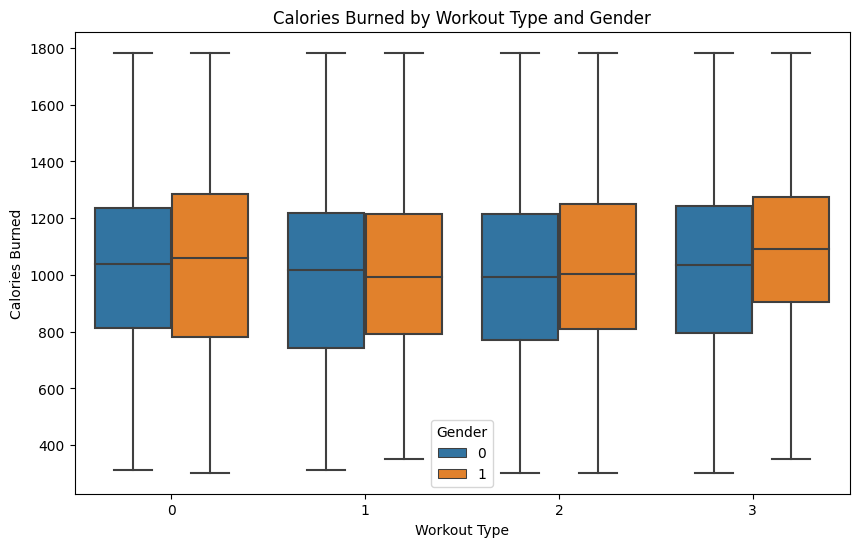

In [29]:


# Plot Calories Burned based on Workout Type and Gender
plt.figure(figsize=(10, 6))

# Calories burned by Workout Type and Gender
sns.boxplot(x='Workout_Type', y='Calories_Burned', hue='Gender', data=df)
plt.title('Calories Burned by Workout Type and Gender')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()


### **2. Correlation between Session_Duration and Calories_Burned:**
- Investigating the correlation between `Session_Duration (hours)` and `Calories_Burned` can provide insights into whether longer workout sessions result in higher calories burned.
- A positive correlation would suggest that as the duration of a workout increases, the calories burned also tend to increase, which is typically expected.


In [30]:
# Calculate correlation between Session Duration and Calories Burned
correlation = df['Session_Duration (hours)'].corr(df['Calories_Burned'])
print(f'Correlation between Session Duration and Calories Burned: {correlation:.2f}')


Correlation between Session Duration and Calories Burned: 0.03


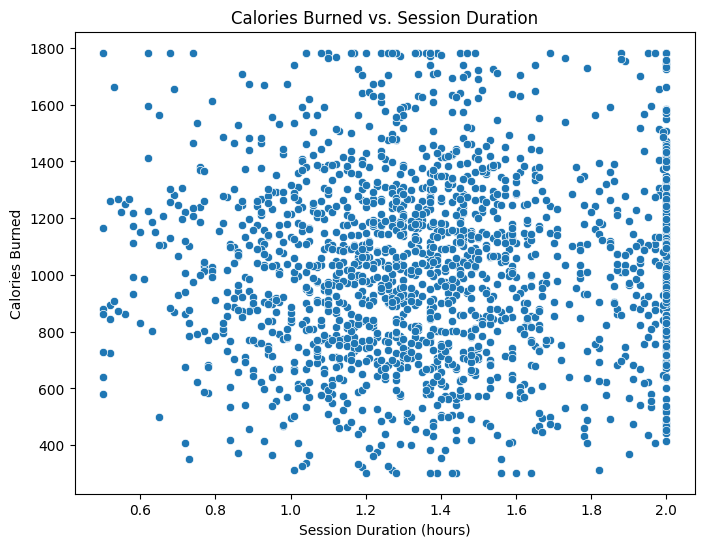

In [31]:

# Scatter plot to visualize correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', data=df)
plt.title('Calories Burned vs. Session Duration')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()


### **3. Notable Differences in BMI across Workout_Frequency:**
- Analyzing the differences in `BMI` across `Workout_Frequency (days/week)` can help identify if individuals who work out more frequently have lower BMI on average.
- This analysis can indicate if there is a relationship between the frequency of workouts and body mass index, which could help guide workout frequency recommendations for maintaining a healthy BMI.


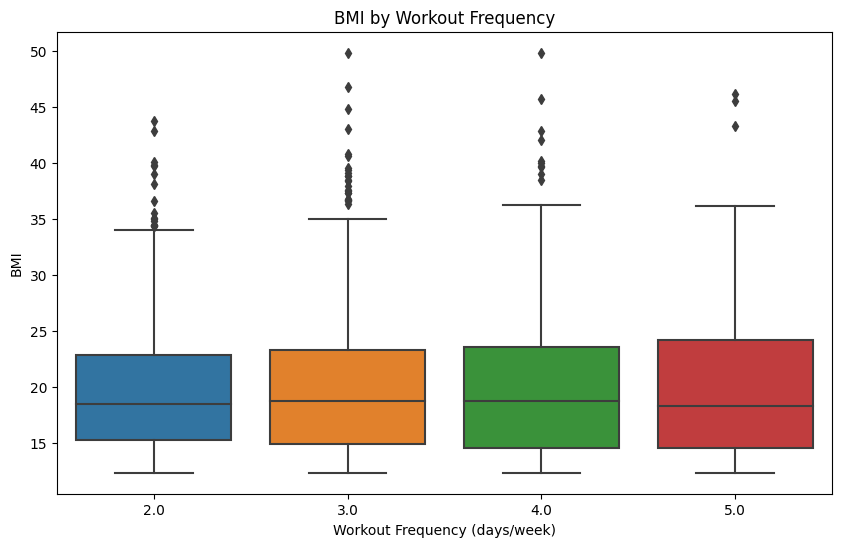

In [32]:
# Boxplot of BMI by Workout Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Workout_Frequency (days/week)', y='BMI', data=df)
plt.title('BMI by Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('BMI')
plt.show()


## **Final Summary**

### Calories Burned:
The analysis shows that workout type and gender significantly affect calories burned. For example, intense workout types like HIIT or cardio might result in more calories burned compared to moderate strength training. Gender-based differences could arise from physiological factors like muscle mass.

### Session Duration and Calories Burned:
There's a positive correlation between session duration and calories burned. Longer workouts tend to burn more calories, suggesting that increasing workout duration could help with weight management or fitness goals.

### BMI and Workout Frequency:
People who work out more frequently tend to have lower BMI, though this might not be a universal trend and could be influenced by other factors such as workout type and individual metabolism.
